In [1]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from keras.models import load_model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.graph_objects as go
from math import sqrt
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_stata('NSDUH_2020.dta')
df['BMI2']=pd.to_numeric(df['BMI2'], errors='coerce')

df['NEWRACE2'] = df['NEWRACE2'].replace('1 - NonHisp White','White')
df['NEWRACE2'] = df['NEWRACE2'].replace('2 - NonHisp Black/Afr Am','Black')
df['NEWRACE2'] = df['NEWRACE2'].replace('3 - NonHisp Native Am/AK Native','Others')
df['NEWRACE2'] = df['NEWRACE2'].replace('4 - NonHisp Native HI/Other Pac Isl','Others')
df['NEWRACE2'] = df['NEWRACE2'].replace('5 - NonHisp Asian','Others')
df['NEWRACE2'] = df['NEWRACE2'].replace('6 - NonHisp more than one race','Others')
df['NEWRACE2'] = df['NEWRACE2'].replace('7 - Hispanic','Others')

data=df[['NEWRACE2', 'INCOME' ,'ADDPREV','OXCOPDAPYU', 'OXYMPDAPYU', 'HYDCPDAPYU', 'HYDMPDAPYU', 'FENTPDAPYU',
         'MORPPDAPYU', 'CODEPDAPYU', 'MTDNPDAPYU', 'TRAMPDAPYU', 'BUPRPDAPYU',
         'HEREVER','TXEVRRCVD','DIABETEVR', 'COPDEVER', 'CIRROSEVR', 'HEPBCEVER',
         'KIDNYDSEV', 'ASTHMAEVR', 'HIVAIDSEV', 'CANCEREVR','IRSEX', 'IRMARIT', 'WRK35WKUS', 'UDPYOPI']]

data=pd.get_dummies(data)

data=data.drop(['INCOME_2 - $20,000 - $49,999', 'INCOME_3 - $50,000 - $74,999',  'INCOME_4 - $75,000 or More', 'ADDPREV_85 - BAD DATA Logically assigned', 'ADDPREV_94 - DON T KNOW', 'ADDPREV_97 - REFUSED', 'ADDPREV_98 - BLANK',
                'ADDPREV_99 - LEGITIMATE SKIP', 'IRSEX_2 - Female',
                'OXCOPDAPYU_0 - No/Unknown', 'OXYMPDAPYU_0 - No/Unknown', 'HYDCPDAPYU_0 - No/Unknown', 'HYDMPDAPYU_0 - No/Unknown',
               'FENTPDAPYU_0 - No/Unknown', 'MORPPDAPYU_0 - No/Unknown', 'CODEPDAPYU_0 - No/Unknown', 'MTDNPDAPYU_0 - No/Unknown',
               'TRAMPDAPYU_0 - No/Unknown', 'BUPRPDAPYU_0 - No/Unknown', 'HEREVER_94 - DON T KNOW',
'HEREVER_97 - REFUSED', 'TXEVRRCVD_85 - BAD DATA Logically assigned',
'TXEVRRCVD_91 - NEVER USED ALCOHOL OR DRUGS','TXEVRRCVD_94 - DON T KNOW','TXEVRRCVD_97 - REFUSED','TXEVRRCVD_98 - BLANK',
                'DIABETEVR_85 - BAD DATA Logically assigned'
,'DIABETEVR_94 - DON T KNOW','DIABETEVR_97 - REFUSED','DIABETEVR_98 - BLANK','DIABETEVR_99 - LEGITIMATE SKIP',
                'COPDEVER_85 - BAD DATA Logically assigned','COPDEVER_94 - DON T KNOW','COPDEVER_97 - REFUSED'
,'COPDEVER_98 - BLANK','COPDEVER_99 - LEGITIMATE SKIP', 'CIRROSEVR_85 - BAD DATA Logically assigned'
,'CIRROSEVR_94 - DON T KNOW','CIRROSEVR_97 - REFUSED','CIRROSEVR_98 - BLANK','CIRROSEVR_99 - LEGITIMATE SKIP',
                'HEPBCEVER_85 - BAD DATA Logically assigned','HEPBCEVER_94 - DON T KNOW','HEPBCEVER_97 - REFUSED'
,'HEPBCEVER_98 - BLANK','HEPBCEVER_99 - LEGITIMATE SKIP'
,'KIDNYDSEV_85 - BAD DATA Logically assigned','KIDNYDSEV_94 - DON T KNOW','KIDNYDSEV_97 - REFUSED','KIDNYDSEV_98 - BLANK'
,'KIDNYDSEV_99 - LEGITIMATE SKIP','ASTHMAEVR_85 - BAD DATA Logically assigned','ASTHMAEVR_94 - DON T KNOW','ASTHMAEVR_97 - REFUSED',
'ASTHMAEVR_98 - BLANK','ASTHMAEVR_99 - LEGITIMATE SKIP', 'HIVAIDSEV_85 - BAD DATA Logically assigned'
,'HIVAIDSEV_94 - DON T KNOW','HIVAIDSEV_97 - REFUSED','HIVAIDSEV_98 - BLANK','HIVAIDSEV_99 - LEGITIMATE SKIP',
              'CANCEREVR_85 - BAD DATA Logically assigned','CANCEREVR_94 - DON T KNOW','CANCEREVR_97 - REFUSED'
,'CANCEREVR_98 - BLANK','CANCEREVR_99 - LEGITIMATE SKIP'
,'WRK35WKUS_85 - BAD DATA Logically assigned','WRK35WKUS_94 - DON T KNOW','WRK35WKUS_97 - REFUSED','WRK35WKUS_98 - BLANK'
,'WRK35WKUS_99 - LEGITIMATE SKIP', 'UDPYOPI_0 - No', 'IRMARIT_99 - LEGITIMATE SKIP Respondent is <= 14 years old'
               ], axis=1)

data

,NEWRACE2_White,NEWRACE2_Black,NEWRACE2_Others,"INCOME_1 - Less than $20,000",ADDPREV_1 - Yes,ADDPREV_2 - No,OXCOPDAPYU_1 - Yes,OXYMPDAPYU_1 - Yes,HYDCPDAPYU_1 - Yes,HYDMPDAPYU_1 - Yes,...,CANCEREVR_1 - Yes,CANCEREVR_2 - No,IRSEX_1 - Male,IRMARIT_1 - Married,IRMARIT_2 - Widowed,IRMARIT_3 - Divorced or Separated,IRMARIT_4 - Never Been Married,WRK35WKUS_1 - Yes,WRK35WKUS_2 - No,UDPYOPI_1 - Yes
0,True,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,True,False,True,False,False
1,True,False,False,False,False,True,False,False,True,False,...,False,False,True,False,False,False,True,True,False,False
2,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32888,True,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
32889,True,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False
32890,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32891,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [3]:
d_pos=data[data['UDPYOPI_1 - Yes'].isin([1])]
d_neg=data[data['UDPYOPI_1 - Yes'].isin([0])]
data=pd.concat([d_pos, d_neg])

X=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y=data['UDPYOPI_1 - Yes']
X=X.astype(float)
y=y.astype(float)
df1=df[['BMI2']]
df1=df1.astype(float)
X=pd.concat([X, df1], axis=1)

X=X.fillna(0)

In [4]:
data=pd.concat([X, y], axis=1)
data=data.dropna()

In [5]:
data

,NEWRACE2_White,NEWRACE2_Black,NEWRACE2_Others,"INCOME_1 - Less than $20,000",ADDPREV_1 - Yes,ADDPREV_2 - No,OXCOPDAPYU_1 - Yes,OXYMPDAPYU_1 - Yes,HYDCPDAPYU_1 - Yes,HYDMPDAPYU_1 - Yes,...,CANCEREVR_2 - No,IRSEX_1 - Male,IRMARIT_1 - Married,IRMARIT_2 - Widowed,IRMARIT_3 - Divorced or Separated,IRMARIT_4 - Never Been Married,WRK35WKUS_1 - Yes,WRK35WKUS_2 - No,BMI2,UDPYOPI_1 - Yes
193,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,23.025951,1.0
258,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,27.546122,1.0
430,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.500099,1.0
776,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,25.151424,1.0
887,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23.108108,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,38.391094,0.0
32889,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,36.868444,0.0
32890,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.812819,0.0
32891,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,21.726686,0.0


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

features = ['NEWRACE2_White', 'NEWRACE2_Black', 'NEWRACE2_Others',
            'INCOME_1 - Less than $20,000', 'IRSEX_1 - Male', 'IRMARIT_1 - Married',
            'IRMARIT_2 - Widowed', 'IRMARIT_3 - Divorced or Separated',
            'IRMARIT_4 - Never Been Married', 'WRK35WKUS_1 - Yes',
            'WRK35WKUS_2 - No', 'BMI2']

X_control = data[features]
model = LogisticRegression()
model.fit(X_control, y)
data['propensity_score'] = model.predict_proba(X_control)[:, 1]

treated = data[data['UDPYOPI_1 - Yes'] == 1]
control = data[data['UDPYOPI_1 - Yes'] == 0]

nn = NearestNeighbors(n_neighbors=158)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])

matched_indices = indices.flatten()
matched_control = control.iloc[matched_indices]
matched_data = pd.concat([treated, matched_control])

counts = matched_data['UDPYOPI_1 - Yes'].value_counts()
number_of_OUD_cases = counts.get(1, 0)
number_of_non_OUD_cases = counts.get(0, 0)

print(f"Number of OUD (treatment) cases after matching: {number_of_OUD_cases}")
print(f"Number of non-OUD (control) cases after matching: {number_of_non_OUD_cases}")

if number_of_non_OUD_cases > number_of_OUD_cases:
    print("Class 0 (non-OUD) is the control group, and there are more control cases than treatment cases after matching.")
else:
    print("Class 1 (OUD) is the treatment group, and the matching has resulted in more treatment cases.")


Number of OUD (treatment) cases after matching: 207
Number of non-OUD (control) cases after matching: 32706
Class 0 (non-OUD) is the control group, and there are more control cases than treatment cases after matching.


In [7]:
matched_data_full = data.loc[matched_data.index]

matched_data_full


,NEWRACE2_White,NEWRACE2_Black,NEWRACE2_Others,"INCOME_1 - Less than $20,000",ADDPREV_1 - Yes,ADDPREV_2 - No,OXCOPDAPYU_1 - Yes,OXYMPDAPYU_1 - Yes,HYDCPDAPYU_1 - Yes,HYDMPDAPYU_1 - Yes,...,IRSEX_1 - Male,IRMARIT_1 - Married,IRMARIT_2 - Widowed,IRMARIT_3 - Divorced or Separated,IRMARIT_4 - Never Been Married,WRK35WKUS_1 - Yes,WRK35WKUS_2 - No,BMI2,UDPYOPI_1 - Yes,propensity_score
193,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,23.025951,1.0,0.005049
258,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,27.546122,1.0,0.006936
430,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.500099,1.0,0.006709
776,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,25.151424,1.0,0.009169
887,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23.108108,1.0,0.011472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.084252,0.0,0.008294
23435,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,19.737549,0.0,0.008408
21424,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,23.294675,0.0,0.008293
18179,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,23.294675,0.0,0.008293


In [8]:
d_pos=matched_data_full[matched_data_full['UDPYOPI_1 - Yes'].isin([1])]
d_neg=matched_data_full[matched_data_full['UDPYOPI_1 - Yes'].isin([0])]
matched_data_full=pd.concat([d_pos, d_neg])

X=matched_data_full.drop(['UDPYOPI_1 - Yes', 'propensity_score'], axis=1)
y=matched_data_full['UDPYOPI_1 - Yes']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y) # Use stratify to have the same proportion of each class

In [10]:
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))

In [ ]:
sklearn_weights

{0: 0.5031722978137899, 1: 79.30722891566265}

In [ ]:
X.columns

Index(['NEWRACE2_White', 'NEWRACE2_Black', 'NEWRACE2_Others',
       'INCOME_1 - Less than $20,000', 'ADDPREV_1 - Yes', 'ADDPREV_2 - No',
       'OXCOPDAPYU_1 - Yes', 'OXYMPDAPYU_1 - Yes', 'HYDCPDAPYU_1 - Yes',
       'HYDMPDAPYU_1 - Yes', 'FENTPDAPYU_1 - Yes', 'MORPPDAPYU_1 - Yes',
       'CODEPDAPYU_1 - Yes', 'MTDNPDAPYU_1 - Yes', 'TRAMPDAPYU_1 - Yes',
       'BUPRPDAPYU_1 - Yes', 'HEREVER_1 - Yes', 'HEREVER_2 - No',
       'TXEVRRCVD_1 - Yes', 'TXEVRRCVD_2 - No', 'DIABETEVR_1 - Yes',
       'DIABETEVR_2 - No', 'COPDEVER_1 - Yes', 'COPDEVER_2 - No',
       'CIRROSEVR_1 - Yes', 'CIRROSEVR_2 - No', 'HEPBCEVER_1 - Yes',
       'HEPBCEVER_2 - No', 'KIDNYDSEV_1 - Yes', 'KIDNYDSEV_2 - No',
       'ASTHMAEVR_1 - Yes', 'ASTHMAEVR_2 - No', 'HIVAIDSEV_1 - Yes',
       'HIVAIDSEV_2 - No', 'CANCEREVR_1 - Yes', 'CANCEREVR_2 - No',
       'IRSEX_1 - Male', 'IRMARIT_1 - Married', 'IRMARIT_2 - Widowed',
       'IRMARIT_3 - Divorced or Separated', 'IRMARIT_4 - Never Been Married',
       'WRK35WKUS_1

In [ ]:
def algorithm():
    tf.keras.utils.set_random_seed(43)  # sets seeds for base-python, numpy and tf
    tf.config.experimental.enable_op_determinism()

algorithm()

checkpoint = ModelCheckpoint(filepath='best_model_adam.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_train, # Features
y_train, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=sklearn_weights,
validation_data=(X_test, y_test))

Epoch 1/20
411/412 [============================>.] - ETA: 0s - loss: 0.9703 - accuracy: 0.7514
Epoch 1: val_accuracy improved from -inf to 0.96218, saving model to best_model_adam.h5
412/412 [==============================] - 24s 50ms/step - loss: 0.9693 - accuracy: 0.7516 - val_loss: 0.1333 - val_accuracy: 0.9622
Epoch 2/20
412/412 [==============================] - ETA: 0s - loss: 0.3818 - accuracy: 0.8564
Epoch 2: val_accuracy did not improve from 0.96218
412/412 [==============================] - 19s 46ms/step - loss: 0.3818 - accuracy: 0.8564 - val_loss: 0.4419 - val_accuracy: 0.8434
Epoch 3/20
412/412 [==============================] - ETA: 0s - loss: 0.3128 - accuracy: 0.8916
Epoch 3: val_accuracy did not improve from 0.96218
412/412 [==============================] - 15s 37ms/step - loss: 0.3128 - accuracy: 0.8916 - val_loss: 0.2805 - val_accuracy: 0.8871
Epoch 4/20
411/412 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.8932
Epoch 4: val_accuracy did n

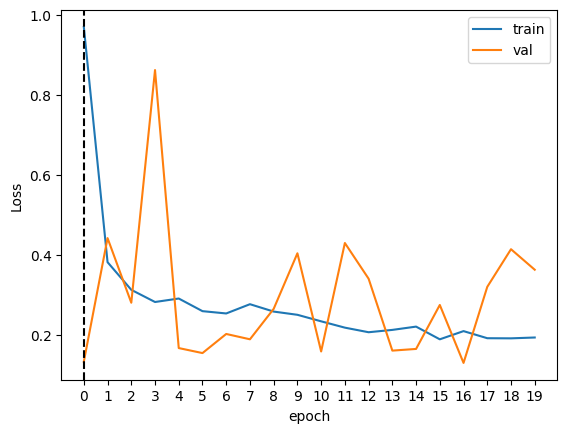

In [ ]:
plt.xticks(np.arange(0, 20, 1))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
a=history.history['val_accuracy']
plt.axvline(x=a.index(max(a)), color='black', ls='--')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

206/206 [==============================] - 1s 4ms/step


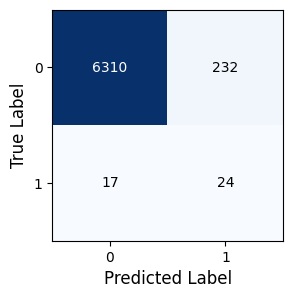

In [ ]:
network = load_model('best_model_adam.h5')

a=network.predict(X_test)
pred=[]
for i in range(len(a)):
    if a[i]>=0.5:
        pred.append(1)
    else:
        pred.append(0)

conf_matrix = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(3, 3), cmap=plt.cm.Blues)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
accuracy=(conf_matrix[0,0]+conf_matrix[1,1])/(conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[0,1]+conf_matrix[1,0])
sensitivity=conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
precision=conf_matrix[1,1]/(conf_matrix[0,1]+conf_matrix[1,1])
f1_score=2*precision*sensitivity/(precision+sensitivity)
plt.show()

In [ ]:
def plot_roc_curve(true_y, y_prob, positive=1):
    c_fill      = 'rgba(52, 152, 219, 0.2)'
    c_line      = 'rgba(52, 152, 219, 0.5)'
    c_line_main = 'rgba(200, 50, 50, 1.0)'
    c_grid      = 'rgba(189, 195, 199, 0.5)'
    c_annot     = 'rgba(149, 165, 166, 0.5)'
    c_i = 'rgba(255, 255, 255, 0)'
    c_highlight = 'rgba(192, 57, 43, 1.0)'
    AUC = roc_auc_score(true_y, y_prob)
    N1 = sum(true_y == positive)
    N2 = sum(true_y != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    auc=roc_auc_score(true_y, y_prob)
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    fig = go.Figure([

    go.Scatter(
        x          = fpr,
        y          = tpr,
        line       = dict(color=c_line_main, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'AUC: {auc:.4f}'),
    go.Scatter(
        x          = fpr,
        y          = tpr,
        line       = dict(color=c_i, width=0),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'(95% CI '+f'{lower:.4f}-{upper:.4f})')
    ])
    fig.add_shape(
        type ='line',
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_layout(
        template    = 'plotly_white',
        title_x     = 0.5,
        xaxis_title = "1 - Specificity",
        yaxis_title = "Recall",
        width       = 600,
        height      = 600,
        legend      = dict(
            yanchor="bottom",
            xanchor="right",
            x=0.95,
            y=0.01,
        )
    )
    fig.update_yaxes(
        range       = [0, 1],
        gridcolor   = c_grid,
        scaleanchor = "x",
        scaleratio  = 1,
        linecolor   = 'black')
    fig.update_xaxes(
        range       = [0, 1],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black')
    return fig


c_fill      = 'rgba(52, 152, 219, 0.2)'
c_line      = 'rgba(52, 152, 219, 0.5)'
c_line_main1 = 'rgba(250, 50, 50, 1.0)'
c_line_main2 = 'rgba(50, 50, 250, 1.0)'
c_grid      = 'rgba(5, 5, 5, 0.5)'
c_annot     = 'rgba(149, 165, 166, 0.5)'
c_i = 'rgba(255, 255, 255, 0)'
c_highlight = 'rgba(192, 57, 43, 1.0)'

def plot_roc_curve2(true_y1, y_prob1, true_y2, y_prob2, name1, name2, positive=1):
    c_fill      = 'rgba(52, 152, 219, 0.2)'
    c_line      = 'rgba(52, 152, 219, 0.5)'
    c_line_main1 = 'rgba(250, 50, 50, 1.0)'
    c_line_main2 = 'rgba(50, 50, 250, 1.0)'
    c_grid      = 'rgba(5, 5, 5, 0.5)'
    c_annot     = 'rgba(149, 165, 166, 0.5)'
    c_i = 'rgba(255, 255, 255, 0)'
    c_highlight = 'rgba(192, 57, 43, 1.0)'
    AUC1 = roc_auc_score(true_y1, y_prob1)
    N1 = sum(true_y1 == positive)
    N2 = sum(true_y1 != positive)
    Q1 = AUC1 / (2 - AUC1)
    Q2 = 2*AUC1**2 / (1 + AUC1)
    SE_AUC1 = sqrt((AUC1*(1 - AUC1) + (N1 - 1)*(Q1 - AUC1**2) + (N2 - 1)*(Q2 - AUC1**2)) / (N1*N2))
    lower1 = AUC1 - 1.96*SE_AUC1
    upper1 = AUC1 + 1.96*SE_AUC1
    if lower1 < 0:
        lower1 = 0
    if upper1 > 1:
        upper1 = 1
    auc1=roc_auc_score(true_y1, y_prob1)
    fpr1, tpr1, thresholds1 = roc_curve(true_y1, y_prob1)


    AUC2 = roc_auc_score(true_y2, y_prob2)
    N1 = sum(true_y2 == positive)
    N2 = sum(true_y2 != positive)
    Q1 = AUC2 / (2 - AUC2)
    Q2 = 2*AUC2**2 / (1 + AUC2)
    SE_AUC2 = sqrt((AUC2*(1 - AUC2) + (N1 - 1)*(Q1 - AUC2**2) + (N2 - 1)*(Q2 - AUC2**2)) / (N1*N2))
    lower2 = AUC2 - 1.96*SE_AUC2
    upper2 = AUC2 + 1.96*SE_AUC2
    if lower2 < 0:
        lower2 = 0
    if upper2 > 1:
        upper2 = 1
    auc2=roc_auc_score(true_y2, y_prob2)
    fpr2, tpr2, thresholds2 = roc_curve(true_y2, y_prob2)

    fig = go.Figure([
    go.Scatter(
        x          = fpr1,
        y          = tpr1,
        line       = dict(color=c_line_main1, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>'+name1+'</b>'),
    go.Scatter(
        x          = fpr1,
        y          = tpr1,
        line       = dict(color=c_i, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'AUC: {auc1:.4f}'),
    go.Scatter(
        x          = fpr1,
        y          = tpr1,
        line       = dict(color=c_i, width=0),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'(95% CI: '+f'{lower1:.4f}-{upper1:.4f})'),
    go.Scatter(
        x          = fpr2,
        y          = tpr2,
        line       = dict(color=c_line_main2, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>'+name2+'</b>'),
    go.Scatter(
        x          = fpr2,
        y          = tpr2,
        line       = dict(color=c_i, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'AUC: {auc2:.4f}'),
    go.Scatter(
        x          = fpr2,
        y          = tpr2,
        line       = dict(color=c_i, width=0),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'(95% CI: '+f'{lower2:.4f}-{upper2:.4f})')
    ])
    fig.add_shape(
        type ='line',
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_layout(
        template    = 'plotly_white',
        title_x     = 1,
        xaxis_title = '<b>1-Specificity</b>',
        yaxis_title = "<b>Recall</b>",
        width       = 600,
        height      = 600,
        legend      = dict(
            yanchor="bottom",
            xanchor="right",
            x=0.95,
            y=0.01,
        )
    )
    fig.update_layout(
        font=dict(
            family="Times New Roman",
            size=22,  # Set the font size here
            color="Black"
        )
    )
    fig.update_yaxes(
        range       = [0, 1],
        gridcolor   = c_grid,
        scaleanchor = "x",
        scaleratio  = 1,
        linecolor   = 'black')
    fig.update_xaxes(
        range       = [0, 1],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black')
    return fig

In [ ]:
prob=network.predict(X_test)
plot_roc_curve(y_test, prob)

206/206 [==============================] - 2s 7ms/step


In [ ]:
test=pd.concat([X_test, y_test], axis=1)
male1=test.drop(X_test[X_test['IRSEX_1 - Male'] == 0].index)
#male1=male1.sample(85, random_state=43)
male_predictors=male1.drop(['UDPYOPI_1 - Yes'], axis=1)
male_target=male1['UDPYOPI_1 - Yes']
female1=test.drop(X_test[X_test['IRSEX_1 - Male'] == 1].index)
#female1=female1.sample(85, random_state=43)
female_predictors=female1.drop(['UDPYOPI_1 - Yes'], axis=1)
female_target=female1['UDPYOPI_1 - Yes']
male_prob=network.predict(male_predictors)
female_prob=network.predict(female_predictors)
plot_roc_curve2(male_target, male_prob, female_target, female_prob, 'Male', 'Female')

101/101 [==============================] - 1s 7ms/step


In [ ]:
def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

In [ ]:
# Males vs. females

df = []

for i in range_with_floats(0.0, 100.0, 0.1):
    y_pred_male = (male_prob >= i * 0.01).astype(bool)
    cm_g1 = confusion_matrix(male_target, y_pred_male)
    specificity_g1 = cm_g1[0, 0] / (cm_g1[0, 0] + cm_g1[0, 1])
    sensitivity_g1 = cm_g1[1, 1] / (cm_g1[1, 0] + cm_g1[1, 1])

    y_pred_female = (female_prob >= i * 0.01).astype(bool)
    cm_g2 = confusion_matrix(female_target, y_pred_female)
    specificity_g2 = cm_g2[0, 0] / (cm_g2[0, 0] + cm_g2[0, 1])
    sensitivity_g2 = cm_g2[1, 1] / (cm_g2[1, 0] + cm_g2[1, 1])

    difference = abs(specificity_g1 - specificity_g2) + abs(sensitivity_g1 - sensitivity_g2)

    df.append({'difference': difference, 'threshold': i})

df = pd.DataFrame(df)

diff = np.array(df['difference'])

stats.ttest_1samp(diff, popmean=0)

TtestResult(statistic=38.4636452207623, pvalue=2.1667735728449843e-199, df=1000)

In [ ]:
# Males vs. females

df = []

for i in range_with_floats(0.0, 100.0, 0.1):

    y_pred = (prob >= i*0.01).astype(bool)
    cm = confusion_matrix(y_test, y_pred)
    acc = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
    sen = cm[1,1] / (cm[1,0] + cm[1,1])
    if sen >= 0.5 and acc >= 0.5:
        y_pred_male = (male_prob >= i*0.01).astype(bool)
        cm_g1 = confusion_matrix(male_target, y_pred_male)
        specificity_g1 = cm_g1[0,0] / (cm_g1[0,0] + cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1] / (cm_g1[1,0] + cm_g1[1,1])
        accuracy_g1 = (cm_g1[0,0] + cm_g1[1,1]) / (cm_g1[0,0] + cm_g1[0,1] + cm_g1[1,0] + cm_g1[1,1])

        y_pred_female = (female_prob >= i*0.01).astype(bool)
        cm_g2 = confusion_matrix(female_target, y_pred_female)
        specificity_g2 = cm_g2[0,0] / (cm_g2[0,0] + cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1] / (cm_g2[1,0] + cm_g2[1,1])
        accuracy_g2 = (cm_g2[0,0] + cm_g2[1,1]) / (cm_g2[0,0] + cm_g2[0,1] + cm_g2[1,0] + cm_g2[1,1])

        difference = abs(specificity_g1 - specificity_g2) + abs(sensitivity_g1 - sensitivity_g2)

        df.append({'accuracy': acc, 'sensitivity': sen, 'accuracy_g1': accuracy_g1, 'accuracy_g2': accuracy_g2, 'specificity_g1': specificity_g1, 'specificity_g2': specificity_g2, 'sensitivity_g1': sensitivity_g1, 'sensitivity_g2': sensitivity_g2, 'difference': difference, 'threshold': i})

df = pd.DataFrame(df)

min_diff = df.iloc[df['difference'].idxmin()]
print('accuracy:', min_diff['accuracy'], 'sensitivity:', min_diff['sensitivity'], 'accuracy_g1:', min_diff['accuracy_g1'], 'accuracy_g2:', min_diff['accuracy_g2'], 'specificity_g1:', min_diff['specificity_g1'], 'specificity_g2:', min_diff['specificity_g2'], 'sensitivity_g1:', min_diff['sensitivity_g1'], 'sensitivity_g2:', min_diff['sensitivity_g2'], 'difference:', min_diff['difference'], 'threshold:', min_diff['threshold'])

y_pred = (prob >= 50*0.01).astype(bool)
cm = confusion_matrix(y_test, y_pred)
acc = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
sen = cm[1,1] / (cm[1,0] + cm[1,1])

y_pred_male = (network.predict(male_predictors, verbose=0) >= 50*0.01).astype(bool)
cm_g1 = confusion_matrix(male_target, y_pred_male)
specificity_g1 = cm_g1[0,0] / (cm_g1[0,0] + cm_g1[0,1])
sensitivity_g1 = cm_g1[1,1] / (cm_g1[1,0] + cm_g1[1,1])
accuracy_g1 = (cm_g1[0,0] + cm_g1[1,1]) / (cm_g1[0,0] + cm_g1[0,1] + cm_g1[1,0] + cm_g1[1,1])

y_pred_female = (network.predict(female_predictors, verbose=0) >= 50*0.01).astype(bool)
cm_g2 = confusion_matrix(female_target, y_pred_female)
specificity_g2 = cm_g2[0,0] / (cm_g2[0,0] + cm_g2[0,1])
sensitivity_g2 = cm_g2[1,1] / (cm_g2[1,0] + cm_g2[1,1])
accuracy_g2 = (cm_g2[0,0] + cm_g2[1,1]) / (cm_g2[0,0] + cm_g2[0,1] + cm_g2[1,0] + cm_g2[1,1])

difference = abs(specificity_g1 - specificity_g2) + abs(sensitivity_g1 - sensitivity_g2)

print('accuracy:', acc, 'sensitivity:', sen, 'accuracy_g1:', accuracy_g1, 'accuracy_g2:', accuracy_g2, 'specificity_g1:', specificity_g1, 'specificity_g2:', specificity_g2, 'sensitivity_g1:', sensitivity_g1, 'sensitivity_g2:', sensitivity_g2, 'difference:', difference, 'threshold:', 50.0)

accuracy: 0.975846878322953 sensitivity: 0.5121951219512195 accuracy_g1: 0.9767580452920143 accuracy_g2: 0.9748992872637124 specificity_g1: 0.978755236385398 specificity_g2: 0.97875 sensitivity_g1: 0.5 sensitivity_g2: 0.5185185185185185 difference: 0.018523754903916445 threshold: 66.60000000000049
accuracy: 0.9621753000151907 sensitivity: 0.5853658536585366 accuracy_g1: 0.9663289630512515 accuracy_g2: 0.9578555934304307 specificity_g1: 0.9679832435667265 specificity_g2: 0.9609375 sensitivity_g1: 0.5714285714285714 sensitivity_g2: 0.5925925925925926 difference: 0.028209764730747655 threshold: 50.0


In [ ]:
notmarried=test.drop(X_test[X_test['IRMARIT_4 - Never Been Married'] == 0].index)
#notmarried=notmarried.sample(85, random_state=43)
notmarried_predictors=notmarried.drop(['UDPYOPI_1 - Yes'], axis=1)
notmarried_target=notmarried['UDPYOPI_1 - Yes']
elsee=test.drop(X_test[X_test['IRMARIT_4 - Never Been Married'] == 1].index)
#elsee=elsee.sample(85, random_state=43)
elsee_predictors=elsee.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target=elsee['UDPYOPI_1 - Yes']
notmarried_prob=network.predict(notmarried_predictors)
elsee_prob=network.predict(elsee_predictors)
plot_roc_curve2(notmarried_target, notmarried_prob, elsee_target, elsee_prob, 'Never been married', 'Others')

102/102 [==============================] - 1s 5ms/step


In [ ]:
# Not married vs. others
df = []
for i in range_with_floats(0.0, 100.0, 0.1):
        y_pred_notmarried = (notmarried_prob >= i*0.01).astype(bool)
        cm_g1 = confusion_matrix(notmarried_target, y_pred_notmarried)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])

        y_pred_elsee = (elsee_prob >= i*0.01).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

        df.append({'difference':difference, 'threshold':i})

df = pd.DataFrame(df)
diff=np.array(df['difference'])

stats.ttest_1samp(diff, popmean=0)

TtestResult(statistic=57.70758502901251, pvalue=1.6087e-320, df=1000)

In [ ]:
# Not married vs. others

df=[]

for i in range_with_floats(0.0, 100.0, 0.1):
    y_pred = (prob >= i*0.01).astype(bool)
    cm = confusion_matrix(y_test, y_pred)
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    sen=cm[1,1]/(cm[1,0]+cm[1,1])
    if sen>=0.5 and  acc>=0.5:
        y_pred_notmarried = (notmarried_prob >= i*0.01).astype(bool)
        cm_g1 = confusion_matrix(notmarried_target, y_pred_notmarried)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
        accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1])
        y_pred_elsee = (elsee_prob >= i*0.01).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
        accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1])
        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

        df.append({'accuracy':acc, 'sensitivity':sen, 'accuracy_g1':accuracy_g1, 'accuracy_g2':accuracy_g2, 'specificity_g1':specificity_g1, 'specificity_g2':specificity_g2,'sensitivity_g1':sensitivity_g1,'sensitivity_g2':sensitivity_g2, 'difference':difference, 'threshold':i})

df = pd.DataFrame(df)
min_diff = df.iloc[df['difference'].idxmin()]
print('accuracy:', min_diff[0], 'sensitivity:', min_diff[1], 'accuracy_g1:', min_diff[2], 'accuracy_g2:', min_diff[3], 'specificity_g1:', min_diff[4], 'specificity_g2:', min_diff[5], 'sensitivity_g1:', min_diff[6], 'sensitivity_g2:', min_diff[7], 'difference:', min_diff[8], 'threshold:', min_diff[9])

y_pred = (prob >= 50*0.01).astype(bool)
cm = confusion_matrix(y_test, y_pred)
acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
sen=cm[1,1]/(cm[1,0]+cm[1,1])

y_pred_notmarried = (notmarried_prob >= 50*0.01).astype(bool)
cm_g1 = confusion_matrix(notmarried_target, y_pred_notmarried)
specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1])

y_pred_elsee = (elsee_prob >= 50*0.01).astype(bool)
cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1])
difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

print('accuracy:', acc, 'sensitivity:', sen, 'accuracy_g1:', accuracy_g1, 'accuracy_g2:', accuracy_g2, 'specificity_g1:', specificity_g1, 'specificity_g2:', specificity_g2, 'sensitivity_g1:', sensitivity_g1, 'sensitivity_g2:', sensitivity_g2, 'difference:', difference, 'threshold:', 50.0)

accuracy: 0.883335865107094 sensitivity: 0.8780487804878049 accuracy_g1: 0.883623275344931 accuracy_g2: 0.8830409356725146 specificity_g1: 0.8836297859511607 specificity_g2: 0.8831007751937985 sensitivity_g1: 0.8823529411764706 sensitivity_g2: 0.875 difference: 0.007881951933832787 threshold: 18.599999999999994
accuracy: 0.9621753000151907 sensitivity: 0.5853658536585366 accuracy_g1: 0.9658068386322736 accuracy_g2: 0.9584487534626038 specificity_g1: 0.9674404582454025 specificity_g2: 0.9615503875968993 sensitivity_g1: 0.6470588235294118 sensitivity_g2: 0.5416666666666666 difference: 0.11128222751124839 threshold: 50.0


In [ ]:
work=test.drop(X_test[X_test['WRK35WKUS_1 - Yes'] == 0].index)
#pop=pop.sample(95, random_state=25)
work_predictors=work.drop(['UDPYOPI_1 - Yes'], axis=1)
work_target=work['UDPYOPI_1 - Yes']
elsee=test.drop(X_test[X_test['WRK35WKUS_1 - Yes'] == 1].index)
#elsee=elsee.sample(95, random_state=25)
elsee_predictors=elsee.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target=elsee['UDPYOPI_1 - Yes']
work_prob=network.predict(work_predictors)
elsee_prob=network.predict(elsee_predictors)
plot_roc_curve2(work_target, work_prob, elsee_target, elsee_prob, 'Working 35 hours or more', 'Others')

157/157 [==============================] - 1s 4ms/step


In [ ]:
# Working more than 35 hours vs. others
df=[]
for i in range_with_floats(0.0, 100.0, 0.1):
        y_pred_work = (work_prob >= i*0.01).astype(bool)
        cm_g1 = confusion_matrix(work_target, y_pred_work)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])

        y_pred_elsee = (elsee_prob >= i*0.01).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

        df.append({'difference':difference, 'threshold':i})

df = pd.DataFrame(df)
diff=np.array(df['difference'])

stats.ttest_1samp(diff, popmean=0)

TtestResult(statistic=67.11739407306446, pvalue=0.0, df=1000)

In [ ]:
# Working more than 35 hours vs. others

df=[]


for i in range_with_floats(0.0, 100.0, 0.1):
    y_pred = (prob >= i*0.01).astype(bool)
    cm = confusion_matrix(y_test, y_pred)
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    sen=cm[1,1]/(cm[1,0]+cm[1,1])
    if sen>=0.5 and  acc>=0.5:
        y_pred_work = (work_prob >= i*0.01).astype(bool)
        cm_g1 = confusion_matrix(work_target, y_pred_work)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
        accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1])
        y_pred_elsee = (elsee_prob >= i*0.01).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
        accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1])
        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

        df.append({'accuracy':acc, 'sensitivity':sen, 'accuracy_g1':accuracy_g1, 'accuracy_g2':accuracy_g2, 'specificity_g1':specificity_g1, 'specificity_g2':specificity_g2,'sensitivity_g1':sensitivity_g1,'sensitivity_g2':sensitivity_g2, 'difference':difference, 'threshold':i})

df = pd.DataFrame(df)
min_diff = df.iloc[df['difference'].idxmin()]
print('accuracy:', min_diff[0], 'sensitivity:', min_diff[1], 'accuracy_g1:', min_diff[2], 'accuracy_g2:', min_diff[3], 'specificity_g1:', min_diff[4], 'specificity_g2:', min_diff[5], 'sensitivity_g1:', min_diff[6], 'sensitivity_g2:', min_diff[7], 'difference:', min_diff[8], 'threshold:', min_diff[9])

y_pred = (prob >= 50*0.01).astype(bool)
cm = confusion_matrix(y_test, y_pred)
acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
sen=cm[1,1]/(cm[1,0]+cm[1,1])

y_pred_work = (work_prob >= 50*0.01).astype(bool)
cm_g1 = confusion_matrix(work_target, y_pred_work)
specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1])

y_pred_elsee = (elsee_prob >= 50*0.01).astype(bool)
cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1])
difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

print('accuracy:', acc, 'sensitivity:', sen, 'accuracy_g1:', accuracy_g1, 'accuracy_g2:', accuracy_g2, 'specificity_g1:', specificity_g1, 'specificity_g2:', specificity_g2, 'sensitivity_g1:', sensitivity_g1, 'sensitivity_g2:', sensitivity_g2, 'difference:', difference, 'threshold:', 50.0)

accuracy: 0.938629804040711 sensitivity: 0.7073170731707317 accuracy_g1: 0.9324494949494949 accuracy_g2: 0.9405881176235247 specificity_g1: 0.9333333333333333 specificity_g2: 0.942218643044091 sensitivity_g1: 0.7777777777777778 sensitivity_g2: 0.6875 difference: 0.09916308748853542 threshold: 33.80000000000021
accuracy: 0.9621753000151907 sensitivity: 0.5853658536585366 accuracy_g1: 0.9589646464646465 accuracy_g2: 0.9631926385277055 specificity_g1: 0.96 specificity_g2: 0.9659754378900745 sensitivity_g1: 0.7777777777777778 sensitivity_g2: 0.53125 difference: 0.2525032156678523 threshold: 50.0


In [ ]:
white=test.drop(X_test[X_test['NEWRACE2_White'] == 0].index)
#elsee=elsee.sample(95, random_state=25)
white_predictors=white.drop(['UDPYOPI_1 - Yes'], axis=1)
white_target=white['UDPYOPI_1 - Yes']
black=test.drop(X_test[X_test['NEWRACE2_Black'] == 0].index)

#pop=pop.sample(95, random_state=25)
black_predictors=black.drop(['UDPYOPI_1 - Yes'], axis=1)
black_target=black['UDPYOPI_1 - Yes']
white_prob=network.predict(white_predictors)
black_prob=network.predict(black_predictors)
plot_roc_curve2(white_target, white_prob, black_target, black_prob, 'White', 'Black')

19/19 [==============================] - 0s 7ms/step


In [ ]:
# White vs. Black
df=[]
for i in range_with_floats(0.0, 100.0, 0.1):
        y_pred_white = (white_prob >= i*0.01).astype(bool)
        cm_g1 = confusion_matrix(white_target, y_pred_white)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])

        y_pred_black = (black_prob >= i*0.01).astype(bool)
        cm_g2 = confusion_matrix(black_target, y_pred_black)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

        df.append({'difference':difference, 'threshold':i})

df = pd.DataFrame(df)
diff=np.array(df['difference'])

stats.ttest_1samp(diff, popmean=0)

TtestResult(statistic=85.32542799098482, pvalue=0.0, df=1000)

In [ ]:
# White vs. black

df=[]


for i in range_with_floats(0.0, 100.0, 0.1):
    y_pred = (prob >= i*0.01).astype(bool)
    cm = confusion_matrix(y_test, y_pred)
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    sen=cm[1,1]/(cm[1,0]+cm[1,1])
    if sen>=0.5 and  acc>=0.5:
        y_pred_white = (white_prob >= i*0.01).astype(bool)
        cm_g1 = confusion_matrix(white_target, y_pred_white)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
        accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1])
        y_pred_black = (black_prob >= i*0.01).astype(bool)
        cm_g2 = confusion_matrix(black_target, y_pred_black)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
        accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1])
        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

        df.append({'accuracy':acc, 'sensitivity':sen, 'accuracy_g1':accuracy_g1, 'accuracy_g2':accuracy_g2, 'specificity_g1':specificity_g1, 'specificity_g2':specificity_g2,'sensitivity_g1':sensitivity_g1,'sensitivity_g2':sensitivity_g2, 'difference':difference, 'threshold':i})

df = pd.DataFrame(df)
min_diff = df.iloc[df['difference'].idxmin()]
print('accuracy:', min_diff[0], 'sensitivity:', min_diff[1], 'accuracy_g1:', min_diff[2], 'accuracy_g2:', min_diff[3], 'specificity_g1:', min_diff[4], 'specificity_g2:', min_diff[5], 'sensitivity_g1:', min_diff[6], 'sensitivity_g2:', min_diff[7], 'difference:', min_diff[8], 'threshold:', min_diff[9])

y_pred = (prob >= 50*0.01).astype(bool)
cm = confusion_matrix(y_test, y_pred)
acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
sen=cm[1,1]/(cm[1,0]+cm[1,1])

y_pred_white = (white_prob >= 50*0.01).astype(bool)
cm_g1 = confusion_matrix(white_target, y_pred_white)
specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1])

y_pred_black = (black_prob >= 50*0.01).astype(bool)
cm_g2 = confusion_matrix(black_target, y_pred_black)
specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1])
difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

print('accuracy:', acc, 'sensitivity:', sen, 'accuracy_g1:', accuracy_g1, 'accuracy_g2:', accuracy_g2, 'specificity_g1:', specificity_g1, 'specificity_g2:', specificity_g2, 'sensitivity_g1:', sensitivity_g1, 'sensitivity_g2:', sensitivity_g2, 'difference:', difference, 'threshold:', 50.0)

accuracy: 0.8938174084763786 sensitivity: 0.8536585365853658 accuracy_g1: 0.8827940861367045 accuracy_g2: 0.9107438016528926 specificity_g1: 0.8827080638206123 specificity_g2: 0.9119601328903655 sensitivity_g1: 0.896551724137931 sensitivity_g2: 0.6666666666666666 difference: 0.2591371265410176 threshold: 19.900000000000013
accuracy: 0.9621753000151907 sensitivity: 0.5853658536585366 accuracy_g1: 0.9571459181487036 accuracy_g2: 0.9752066115702479 specificity_g1: 0.9590340664079344 specificity_g2: 0.9800664451827242 sensitivity_g1: 0.6551724137931034 sensitivity_g2: 0.0 difference: 0.6762047925678932 threshold: 50.0


In [ ]:
income=test.drop(X_test[X_test['INCOME_1 - Less than $20,000'] == 0].index)
#elsee=elsee.sample(95, random_state=25)
income_predictors=income.drop(['UDPYOPI_1 - Yes'], axis=1)
income_target=income['UDPYOPI_1 - Yes']
elsee=test.drop(X_test[X_test['INCOME_1 - Less than $20,000'] == 1].index)
#pop=pop.sample(95, random_state=25)
elsee_predictors=elsee.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target=elsee['UDPYOPI_1 - Yes']
income_prob=network.predict(income_predictors)
elsee_prob=network.predict(elsee_predictors)
plot_roc_curve2(income_target, income_prob, elsee_target, elsee_prob, 'Income less than $20,000', 'Other')

138/138 [==============================] - 1s 7ms/step


In [ ]:
# income less than 20 vs. others
df=[]
for i in range_with_floats(0.0, 100.0, 0.1):
        y_pred_income = (income_prob >= i*0.01).astype(bool)
        cm_g1 = confusion_matrix(income_target, y_pred_income)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])

        y_pred_elsee = (elsee_prob >= i*0.01).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

        df.append({'difference':difference, 'threshold':i})

df = pd.DataFrame(df)
diff=np.array(df['difference'])

stats.ttest_1samp(diff, popmean=0)

TtestResult(statistic=64.58316305610002, pvalue=0.0, df=1000)

In [ ]:
# income less than 20 vs. others

df=[]


for i in range_with_floats(0.0, 100.0, 0.1):
    y_pred = (prob >= i*0.01).astype(bool)
    cm = confusion_matrix(y_test, y_pred)
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    sen=cm[1,1]/(cm[1,0]+cm[1,1])
    if sen>=0.5 and  acc>=0.5:
        y_pred_income = (income_prob >= i*0.01).astype(bool)
        cm_g1 = confusion_matrix(income_target, y_pred_income)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
        accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1])
        y_pred_elsee = (elsee_prob >= i*0.01).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
        accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1])
        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

        df.append({'accuracy':acc, 'sensitivity':sen, 'accuracy_g1':accuracy_g1, 'accuracy_g2':accuracy_g2, 'specificity_g1':specificity_g1, 'specificity_g2':specificity_g2,'sensitivity_g1':sensitivity_g1,'sensitivity_g2':sensitivity_g2, 'difference':difference, 'threshold':i})

df = pd.DataFrame(df)
min_diff = df.iloc[df['difference'].idxmin()]
print('accuracy:', min_diff[0], 'sensitivity:', min_diff[1], 'accuracy_g1:', min_diff[2], 'accuracy_g2:', min_diff[3], 'specificity_g1:', min_diff[4], 'specificity_g2:', min_diff[5], 'sensitivity_g1:', min_diff[6], 'sensitivity_g2:', min_diff[7], 'difference:', min_diff[8], 'threshold:', min_diff[9])

y_pred = (prob >= 50*0.01).astype(bool)
cm = confusion_matrix(y_test, y_pred)
acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
sen=cm[1,1]/(cm[1,0]+cm[1,1])

y_pred_income = (income_prob >= 50*0.01).astype(bool)
cm_g1 = confusion_matrix(income_target, y_pred_income)
specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1])

y_pred_elsee = (elsee_prob >= 50*0.01).astype(bool)
cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1])
difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

print('accuracy:', acc, 'sensitivity:', sen, 'accuracy_g1:', accuracy_g1, 'accuracy_g2:', accuracy_g2, 'specificity_g1:', specificity_g1, 'specificity_g2:', specificity_g2, 'sensitivity_g1:', sensitivity_g1, 'sensitivity_g2:', sensitivity_g2, 'difference:', difference, 'threshold:', 50.0)

accuracy: 0.9776697554306547 sensitivity: 0.5121951219512195 accuracy_g1: 0.9678751720972923 accuracy_g2: 0.9825158946412352 specificity_g1: 0.9700322729368372 specificity_g2: 0.9858220900983307 sensitivity_g1: 0.5 sensitivity_g2: 0.5161290322580645 difference: 0.031918849419557915 threshold: 68.00000000000041
accuracy: 0.9621753000151907 sensitivity: 0.5853658536585366 accuracy_g1: 0.9398806792106471 accuracy_g2: 0.9732061762034514 specificity_g1: 0.9414476717381282 specificity_g2: 0.9759890235536245 sensitivity_g1: 0.6 sensitivity_g2: 0.5806451612903226 difference: 0.05389619052517369 threshold: 50.0


In [ ]:
male1_test=test.drop(X_test[X_test['IRSEX_1 - Male'] == 0].index)
female1_test=test.drop(X_test[X_test['IRSEX_1 - Male'] == 1].index)


In [ ]:
print(len(male1_test))
print(len(female1_test))


3356
3227


In [ ]:
print(len(male1))
print(len(female1))


3356
3227


In [ ]:
train=pd.concat([X_train, y_train], axis=1)
test=pd.concat([X_test, y_test], axis=1)
female1=train.drop(X_train[X_train['IRSEX_1 - Male'] == 1].index)
male1=train.drop(X_train[X_train['IRSEX_1 - Male'] == 0].index)
male1_test=test.drop(X_test[X_test['IRSEX_1 - Male'] == 0].index)
male1_test=male1_test.sample(3227, random_state=43)
male_predictors_test=male1_test.drop(['UDPYOPI_1 - Yes'], axis=1)
male_target_test=male1_test['UDPYOPI_1 - Yes']
female1_test=test.drop(X_test[X_test['IRSEX_1 - Male'] == 1].index)
female1_test=female1_test.sample(3227, random_state=43)
female_predictors_test=female1_test.drop(['UDPYOPI_1 - Yes'], axis=1)
female_target_test=female1_test['UDPYOPI_1 - Yes']
data_test=pd.concat([male1_test, female1_test])
X_for_test=data_test.drop(['UDPYOPI_1 - Yes'], axis=1)
y_for_test=data_test['UDPYOPI_1 - Yes']

In [ ]:
male1_sample=male1.sample(12944, random_state=43)
female1_sample=female1.sample(12944, random_state=43)
male1_sample=male1_sample.sample(int(0.5*len(male1_sample)), random_state=43)
female1_sample=female1_sample.sample(int(0.5*len(female1_sample)), random_state=43)
data=pd.concat([male1_sample, female1_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights

algorithm()

checkpoint = ModelCheckpoint(filepath='model_50_gender.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

###################################################################

male1_sample=male1.sample(12944, random_state=43)
female1_sample=female1.sample(12944, random_state=43)
male1_sample=male1_sample.sample(int(0.625*len(male1_sample)), random_state=43)
female1_sample=female1_sample.sample(int(0.375*len(female1_sample)), random_state=43)
data=pd.concat([male1_sample, female1_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
algorithm()

checkpoint = ModelCheckpoint(filepath='model_625_gender.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

########################################################

male1_sample=male1.sample(12944, random_state=43)
female1_sample=female1.sample(12944, random_state=43)
male1_sample=male1_sample.sample(int(0.75*len(male1_sample)), random_state=43)
female1_sample=female1_sample.sample(int(0.25*len(female1_sample)), random_state=43)
data=pd.concat([male1_sample, female1_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights

algorithm()

checkpoint = ModelCheckpoint(filepath='model_75_gender.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

######################################################

male1_sample=male1.sample(12944, random_state=43)
female1_sample=female1.sample(12944, random_state=43)
male1_sample=male1_sample.sample(int(0.875*len(male1_sample)), random_state=43)
female1_sample=female1_sample.sample(int(0.125*len(female1_sample)), random_state=43)
data=pd.concat([male1_sample, female1_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights

algorithm()

checkpoint = ModelCheckpoint(filepath='model_875_gender.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

prob1_50=load_model('model_50_gender.h5').predict(male_predictors_test)
prob2_50=load_model('model_50_gender.h5').predict(female_predictors_test)
prob1_625=load_model('model_625_gender.h5').predict(male_predictors_test)
prob2_625=load_model('model_625_gender.h5').predict(female_predictors_test)
prob1_75=load_model('model_75_gender.h5').predict(male_predictors_test)
prob2_75=load_model('model_75_gender.h5').predict(female_predictors_test)
prob1_875=load_model('model_875_gender.h5').predict(male_predictors_test)
prob2_875=load_model('model_875_gender.h5').predict(female_predictors_test)

print('Male (50):', roc_auc_score(male_target_test, prob1_50))
print('Female (50):', roc_auc_score(female_target_test, prob2_50))
print('Male (62.5):', roc_auc_score(male_target_test, prob1_625))
print('Female (37.5):', roc_auc_score(female_target_test, prob2_625))
print('Male (75):', roc_auc_score(male_target_test, prob1_75))
print('Female (25):', roc_auc_score(female_target_test, prob2_75))
print('Male (87.5):', roc_auc_score(male_target_test, prob1_875))
print('Female (12.5):', roc_auc_score(female_target_test, prob2_875))


# x axis values
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(female_target_test, prob2_50),roc_auc_score(female_target_test, prob2_625),
     roc_auc_score(female_target_test, prob2_75),roc_auc_score(female_target_test, prob2_875)]
z = [roc_auc_score(male_target_test, prob1_50),roc_auc_score(male_target_test, prob1_625),
     roc_auc_score(male_target_test, prob1_75),roc_auc_score(male_target_test, prob1_875)]
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>Female</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>Male</b>')
    ])
fig.add_shape(
        type ='line',
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white',
        title_x     = 0.5,
        xaxis_title = "<b>Percentage of males</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 500,
        height      = 500,
        legend      = dict(
            yanchor="bottom",
            xanchor="right",
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x",
        scaleratio  = 170,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)

Epoch 1/20
203/203 [==============================] - ETA: 0s - loss: 1.1767 - accuracy: 0.6333
Epoch 1: val_accuracy improved from -inf to 0.30415, saving model to model_50_gender.h5
203/203 [==============================] - 7s 30ms/step - loss: 1.1767 - accuracy: 0.6333 - val_loss: 1.1119 - val_accuracy: 0.3042
Epoch 2/20
201/203 [============================>.] - ETA: 0s - loss: 0.4698 - accuracy: 0.8410
Epoch 2: val_accuracy improved from 0.30415 to 0.93973, saving model to model_50_gender.h5
203/203 [==============================] - 5s 22ms/step - loss: 0.4676 - accuracy: 0.8417 - val_loss: 0.2245 - val_accuracy: 0.9397
Epoch 3/20
201/203 [============================>.] - ETA: 0s - loss: 0.4057 - accuracy: 0.8744
Epoch 3: val_accuracy did not improve from 0.93973
203/203 [==============================] - 6s 28ms/step - loss: 0.4052 - accuracy: 0.8735 - val_loss: 0.4652 - val_accuracy: 0.8610
Epoch 4/20
202/203 [============================>.] - ETA: 0s - loss: 0.3897 - accurac

In [ ]:
notmarried_test=test.drop(X_test[X_test['IRMARIT_4 - Never Been Married'] == 0].index)
elsee_test=test.drop(X_test[X_test['IRMARIT_4 - Never Been Married'] == 1].index)
print(len(notmarried_test))
print(len(elsee_test))


3334
3249


In [ ]:
notmarried=train.drop(X_train[X_train['IRMARIT_4 - Never Been Married'] == 0].index)
elsee=train.drop(X_train[X_train['IRMARIT_4 - Never Been Married'] == 1].index)
notmarried_test=test.drop(X_test[X_test['IRMARIT_4 - Never Been Married'] == 0].index)
notmarried_test=notmarried_test.sample(3249, random_state=43)
notmarried_predictors_test=notmarried_test.drop(['UDPYOPI_1 - Yes'], axis=1)
notmarried_target_test=notmarried_test['UDPYOPI_1 - Yes']
elsee_test=test.drop(X_test[X_test['IRMARIT_4 - Never Been Married'] == 1].index)
elsee_test=elsee_test.sample(3249, random_state=43)
elsee_predictors_test=elsee_test.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target_test=elsee_test['UDPYOPI_1 - Yes']
data_test=pd.concat([notmarried_test, elsee_test])
X_for_test=data_test.drop(['UDPYOPI_1 - Yes'], axis=1)
y_for_test=data_test['UDPYOPI_1 - Yes']

In [ ]:
print(len(notmarried))
print(len(elsee))


13646
12684


In [ ]:
notmarried_sample=notmarried.sample(12680, random_state=43)
elsee_sample=elsee.sample(12680, random_state=43)
notmarried_sample=notmarried_sample.sample(int(0.5*len(notmarried_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.5*len(elsee_sample)), random_state=43)
data=pd.concat([notmarried_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_50_marit.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

###################################################################

notmarried_sample=notmarried.sample(12680, random_state=43)
elsee_sample=elsee.sample(12680, random_state=43)
notmarried_sample=notmarried_sample.sample(int(0.625*len(notmarried_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.375*len(elsee_sample)), random_state=43)
data=pd.concat([notmarried_sample, elsee_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_625_marit.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

##############################################################

notmarried_sample=notmarried.sample(12680, random_state=43)
elsee_sample=elsee.sample(12680, random_state=43)
notmarried_sample=notmarried_sample.sample(int(0.75*len(notmarried_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.25*len(elsee_sample)), random_state=43)
data=pd.concat([notmarried_sample, elsee_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_75_marit.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

#########################################################################

notmarried_sample=notmarried.sample(12680, random_state=43)
elsee_sample=elsee.sample(12680, random_state=43)
notmarried_sample=notmarried_sample.sample(int(0.875*len(notmarried_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.125*len(elsee_sample)), random_state=43)
data=pd.concat([notmarried_sample, elsee_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_875_marit.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

prob1_50=load_model('model_50_marit.h5').predict(notmarried_predictors_test)
prob2_50=load_model('model_50_marit.h5').predict(elsee_predictors_test)
prob1_625=load_model('model_625_marit.h5').predict(notmarried_predictors_test)
prob2_625=load_model('model_625_marit.h5').predict(elsee_predictors_test)
prob1_75=load_model('model_75_marit.h5').predict(notmarried_predictors_test)
prob2_75=load_model('model_75_marit.h5').predict(elsee_predictors_test)
prob1_875=load_model('model_875_marit.h5').predict(notmarried_predictors_test)
prob2_875=load_model('model_875_marit.h5').predict(elsee_predictors_test)

print('Not Married (50):', roc_auc_score(notmarried_target_test, prob1_50))
print('Else (50):', roc_auc_score(elsee_target_test, prob2_50))
print('Not Married (62.5):', roc_auc_score(notmarried_target_test, prob1_625))
print('Else (37.5):', roc_auc_score(elsee_target_test, prob2_625))
print('Not Married (75):', roc_auc_score(notmarried_target_test, prob1_75))
print('Else (25):', roc_auc_score(elsee_target_test, prob2_75))
print('Not Married (87.5):', roc_auc_score(notmarried_target_test, prob1_875))
print('Else (12.5):', roc_auc_score(elsee_target_test, prob2_875))

# x axis values
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(elsee_target_test, prob2_50),roc_auc_score(elsee_target_test, prob2_625),
     roc_auc_score(elsee_target_test, prob2_75),roc_auc_score(elsee_target_test, prob2_875)]
z = [roc_auc_score(notmarried_target_test, prob1_50),roc_auc_score(notmarried_target_test, prob1_625),
     roc_auc_score(notmarried_target_test, prob1_75),roc_auc_score(notmarried_target_test, prob1_875)]
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Others</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Never been married</b>')
    ])
fig.add_shape(
        type ='line',
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white',
        title_x     = 0.5,
        xaxis_title = "<b>Percentage of 'Never been married'</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 600,
        height      = 500,
        legend      = dict(
            yanchor="bottom",
            xanchor="right",
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x",
        scaleratio  = 170,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)

Epoch 1/20
198/199 [============================>.] - ETA: 0s - loss: 1.1081 - accuracy: 0.6207
Epoch 1: val_accuracy improved from -inf to 0.32148, saving model to model_50_marit.h5
199/199 [==============================] - 6s 24ms/step - loss: 1.1079 - accuracy: 0.6205 - val_loss: 1.0351 - val_accuracy: 0.3215
Epoch 2/20
197/199 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7961
Epoch 2: val_accuracy improved from 0.32148 to 0.62142, saving model to model_50_marit.h5
199/199 [==============================] - 6s 29ms/step - loss: 0.5543 - accuracy: 0.7946 - val_loss: 0.6850 - val_accuracy: 0.6214
Epoch 3/20
198/199 [============================>.] - ETA: 0s - loss: 0.3568 - accuracy: 0.8544
Epoch 3: val_accuracy improved from 0.62142 to 0.97338, saving model to model_50_marit.h5
199/199 [==============================] - 4s 22ms/step - loss: 0.3566 - accuracy: 0.8545 - val_loss: 0.0856 - val_accuracy: 0.9734
Epoch 4/20
197/199 [============================>

In [ ]:
work=train.drop(X_train[X_train['WRK35WKUS_1 - Yes'] == 0].index)
elsee=train.drop(X_train[X_train['WRK35WKUS_1 - Yes'] == 1].index)
work_test=test.drop(X_test[X_test['WRK35WKUS_1 - Yes'] == 0].index)
work_test=work_test.sample(1584, random_state=43)
work_predictors_test=work_test.drop(['UDPYOPI_1 - Yes'], axis=1)
work_target_test=work_test['UDPYOPI_1 - Yes']
elsee_test=test.drop(X_test[X_test['WRK35WKUS_1 - Yes'] == 1].index)
elsee_test=elsee_test.sample(1584, random_state=43)
elsee_predictors_test=elsee_test.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target_test=elsee_test['UDPYOPI_1 - Yes']
data_test=pd.concat([work_test, elsee_test])
X_for_test=data_test.drop(['UDPYOPI_1 - Yes'], axis=1)
y_for_test=data_test['UDPYOPI_1 - Yes']

In [ ]:
print(len(work))
print(len(elsee))

6290
20040


In [ ]:
work_sample=work.sample(6288, random_state=43)
elsee_sample=elsee.sample(6288, random_state=43)
work_sample=work_sample.sample(int(0.5*len(work_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.5*len(elsee_sample)), random_state=43)
data=pd.concat([work_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights

algorithm()

checkpoint = ModelCheckpoint(filepath='model_50_work.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

######################################################################

work_sample=work.sample(6288, random_state=43)
elsee_sample=elsee.sample(6288, random_state=43)
work_sample=work_sample.sample(int(0.625*len(work_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.375*len(elsee_sample)), random_state=43)
data=pd.concat([work_sample, elsee_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_625_work.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

##################################################################################

work_sample=work.sample(6288, random_state=43)
elsee_sample=elsee.sample(6288, random_state=43)
work_sample=work_sample.sample(int(0.75*len(work_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.25*len(elsee_sample)), random_state=43)
data=pd.concat([work_sample, elsee_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_75_work.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

######################################################################

work_sample=work.sample(6288, random_state=43)
elsee_sample=elsee.sample(6288, random_state=43)
work_sample=work_sample.sample(int(0.875*len(work_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.125*len(elsee_sample)), random_state=43)
data=pd.concat([work_sample, elsee_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_875_work.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
algorithm()
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

prob1_50=load_model('model_50_work.h5').predict(work_predictors_test)
prob2_50=load_model('model_50_work.h5').predict(elsee_predictors_test)
prob1_625=load_model('model_625_work.h5').predict(work_predictors_test)
prob2_625=load_model('model_625_work.h5').predict(elsee_predictors_test)
prob1_75=load_model('model_75_work.h5').predict(work_predictors_test)
prob2_75=load_model('model_75_work.h5').predict(elsee_predictors_test)
prob1_875=load_model('model_875_work.h5').predict(work_predictors_test)
prob2_875=load_model('model_875_work.h5').predict(elsee_predictors_test)

print('Working More Than 35 Hours (50):', roc_auc_score(work_target_test, prob1_50))
print('Else (50):', roc_auc_score(elsee_target_test, prob2_50))
print('Working More Than 35 Hours (62.5):', roc_auc_score(work_target_test, prob1_625))
print('Else (37.5):', roc_auc_score(elsee_target_test, prob2_625))
print('Working More Than 35 Hours (75):', roc_auc_score(work_target_test, prob1_75))
print('Else (25):', roc_auc_score(elsee_target_test, prob2_75))
print('Working More Than 35 Hours (87.5):', roc_auc_score(work_target_test, prob1_875))
print('Else (12.5):', roc_auc_score(elsee_target_test, prob2_875))

# x axis values
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(elsee_target_test, prob2_50),roc_auc_score(elsee_target_test, prob2_625),
     roc_auc_score(elsee_target_test, prob2_75),roc_auc_score(elsee_target_test, prob2_875)]
z = [roc_auc_score(work_target_test, prob1_50),roc_auc_score(work_target_test, prob1_625),
     roc_auc_score(work_target_test, prob1_75),roc_auc_score(work_target_test, prob1_875)]
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Others</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Working 35 hours or more</b>')
    ])
fig.add_shape(
        type ='line',
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white',
        title_x     = 0.3,
        xaxis_title = "<b>Percentage of 'Working 35 hours or more'</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 600,
        height      = 500,
        legend      = dict(
            yanchor="bottom",
            xanchor="right",
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x",
        scaleratio  = 190,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)

Epoch 1/20
96/99 [============================>.] - ETA: 0s - loss: 2.0496 - accuracy: 0.5850
Epoch 1: val_accuracy improved from -inf to 0.99400, saving model to model_50_work.h5
99/99 [==============================] - 3s 24ms/step - loss: 2.0437 - accuracy: 0.5943 - val_loss: 0.0508 - val_accuracy: 0.9940
Epoch 2/20
98/99 [============================>.] - ETA: 0s - loss: 0.9408 - accuracy: 0.7283
Epoch 2: val_accuracy did not improve from 0.99400
99/99 [==============================] - 2s 23ms/step - loss: 0.9388 - accuracy: 0.7290 - val_loss: 0.4444 - val_accuracy: 0.8444
Epoch 3/20
97/99 [============================>.] - ETA: 0s - loss: 0.4443 - accuracy: 0.8724
Epoch 3: val_accuracy did not improve from 0.99400
99/99 [==============================] - 2s 22ms/step - loss: 0.4449 - accuracy: 0.8686 - val_loss: 1.2821 - val_accuracy: 0.3838
Epoch 4/20
98/99 [============================>.] - ETA: 0s - loss: 0.4211 - accuracy: 0.8364
Epoch 4: val_accuracy did not improve from 0.9

In [ ]:
white=train.drop(X_train[X_train['NEWRACE2_White'] == 0].index)
black=train.drop(X_train[X_train['NEWRACE2_Black'] == 0].index)

white_test=test.drop(X_test[X_test['NEWRACE2_White'] == 0].index)
white_test=white_test.sample(605, random_state=43)
white_predictors_test=white_test.drop(['UDPYOPI_1 - Yes'], axis=1)
white_target_test=white_test['UDPYOPI_1 - Yes']

black_test=test.drop(X_test[X_test['NEWRACE2_Black'] == 0].index)
black_test=black_test.sample(605, random_state=43)
black_predictors_test=black_test.drop(['UDPYOPI_1 - Yes'], axis=1)
black_target_test=black_test['UDPYOPI_1 - Yes']
data_test=pd.concat([white_test, black_test])
X_for_test=data_test.drop(['UDPYOPI_1 - Yes'], axis=1)
y_for_test=data_test['UDPYOPI_1 - Yes']

In [ ]:
white_test=test.drop(X_test[X_test['NEWRACE2_White'] == 0].index)
black_test=test.drop(X_test[X_test['NEWRACE2_Black'] == 0].index)
print(len(white_test))
print(len(black_test))


4667
605


In [ ]:
white=train.drop(X_train[X_train['NEWRACE2_White'] == 0].index)
black=train.drop(X_train[X_train['NEWRACE2_Black'] == 0].index)
print(len(white))
print(len(black))

18746
2454


In [ ]:
white_sample=white.sample(2448, random_state=43)
black_sample=black.sample(2448, random_state=43)
white_sample=white_sample.sample(int(0.5*len(white_sample)), random_state=43)
black_sample=black_sample.sample(int(0.5*len(black_sample)), random_state=43)
data=pd.concat([white_sample, black_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights

algorithm()

checkpoint = ModelCheckpoint(filepath='model_50_black.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
netwhite = models.Sequential()
# Add fully connected layer with a ReLU activation function
netwhite.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
netwhite.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
netwhite.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural netwhite
algorithm()
netwhite.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = netwhite.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

######################################################################

white_sample=white.sample(2448, random_state=43)
black_sample=black.sample(2448, random_state=43)
white_sample=white_sample.sample(int(0.375*len(white_sample)), random_state=43)
black_sample=black_sample.sample(int(0.625*len(black_sample)), random_state=43)
data=pd.concat([white_sample, black_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_625_black.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
netwhite = models.Sequential()
# Add fully connected layer with a ReLU activation function
netwhite.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
netwhite.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
netwhite.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural netwhite
algorithm()
netwhite.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = netwhite.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

##################################################################################

white_sample=white.sample(2448, random_state=43)
black_sample=black.sample(2448, random_state=43)
white_sample=white_sample.sample(int(0.25*len(white_sample)), random_state=43)
black_sample=black_sample.sample(int(0.75*len(black_sample)), random_state=43)
data=pd.concat([white_sample, black_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_75_black.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
netwhite = models.Sequential()
# Add fully connected layer with a ReLU activation function
netwhite.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
netwhite.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
netwhite.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural netwhite
algorithm()
netwhite.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = netwhite.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

######################################################################

white_sample=white.sample(2448, random_state=43)
black_sample=black.sample(2448, random_state=43)
white_sample=white_sample.sample(int(0.125*len(white_sample)), random_state=43)
black_sample=black_sample.sample(int(0.875*len(black_sample)), random_state=43)
data=pd.concat([white_sample, black_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_875_black.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
netwhite = models.Sequential()
# Add fully connected layer with a ReLU activation function
netwhite.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
netwhite.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
netwhite.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural netwhite
algorithm()
netwhite.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = netwhite.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

prob2_50=load_model('model_50_black.h5').predict(white_predictors_test)
prob1_50=load_model('model_50_black.h5').predict(black_predictors_test)
prob2_625=load_model('model_625_black.h5').predict(white_predictors_test)
prob1_625=load_model('model_625_black.h5').predict(black_predictors_test)
prob2_75=load_model('model_75_black.h5').predict(white_predictors_test)
prob1_75=load_model('model_75_black.h5').predict(black_predictors_test)
prob2_875=load_model('model_875_black.h5').predict(white_predictors_test)
prob1_875=load_model('model_875_black.h5').predict(black_predictors_test)

print('Black (50):', roc_auc_score(black_target_test, prob1_50))
print('White (50):', roc_auc_score(white_target_test, prob2_50))
print('Black (62.5):', roc_auc_score(black_target_test, prob1_625))
print('White (37.5):', roc_auc_score(white_target_test, prob2_625))
print('Black (75):', roc_auc_score(black_target_test, prob1_75))
print('White (25):', roc_auc_score(white_target_test, prob2_75))
print('Black (87.5):', roc_auc_score(black_target_test, prob1_875))
print('White (12.5):', roc_auc_score(white_target_test, prob2_875))

# x axis values
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(black_target_test, prob1_50),roc_auc_score(black_target_test, prob1_625),
     roc_auc_score(black_target_test, prob1_75),roc_auc_score(black_target_test, prob1_875)]
z = [roc_auc_score(white_target_test, prob2_50),roc_auc_score(white_target_test, prob2_625),
     roc_auc_score(white_target_test, prob2_75),roc_auc_score(white_target_test, prob2_875)]
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Black</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>White</b>')
    ])
fig.add_shape(
        type ='line',
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white',
        title_x     = 0.3,
        xaxis_title = "<b>Percentage of black race</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 600,
        height      = 800,
        legend      = dict(
            yanchor="bottom",
            xanchor="right",
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x",
        scaleratio  = 190,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)


Epoch 1/20
37/39 [===========================>..] - ETA: 0s - loss: 5.2670 - accuracy: 0.5135
Epoch 1: val_accuracy improved from -inf to 0.12727, saving model to model_50_black.h5
39/39 [==============================] - 2s 29ms/step - loss: 5.1590 - accuracy: 0.5020 - val_loss: 4.5963 - val_accuracy: 0.1273
Epoch 2/20
37/39 [===========================>..] - ETA: 0s - loss: 1.2004 - accuracy: 0.5676
Epoch 2: val_accuracy improved from 0.12727 to 0.26446, saving model to model_50_black.h5
39/39 [==============================] - 1s 25ms/step - loss: 1.2077 - accuracy: 0.5527 - val_loss: 1.5416 - val_accuracy: 0.2645
Epoch 3/20
37/39 [===========================>..] - ETA: 0s - loss: 0.5640 - accuracy: 0.7314
Epoch 3: val_accuracy improved from 0.26446 to 0.99256, saving model to model_50_black.h5
39/39 [==============================] - 1s 23ms/step - loss: 0.5457 - accuracy: 0.7402 - val_loss: 0.0440 - val_accuracy: 0.9926
Epoch 4/20
37/39 [===========================>..] - ETA: 0s -

In [ ]:
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(black_target_test, prob1_50),roc_auc_score(black_target_test, prob1_625),
     roc_auc_score(black_target_test, prob1_75),roc_auc_score(black_target_test, prob1_875)]
z = [roc_auc_score(white_target_test, prob2_50),roc_auc_score(white_target_test, prob2_625),
     roc_auc_score(white_target_test, prob2_75),roc_auc_score(white_target_test, prob2_875)]
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Black race</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>White race</b>')
    ])
fig.add_shape(
        type ='line',
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white',
        title_x     = 0.3,
        xaxis_title = "<b>Percentage of black race</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 600,
        height      = 500,
        legend      = dict(
            yanchor="bottom",
            xanchor="right",
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x",
        scaleratio  = 110,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)


In [ ]:
income=train.drop(X_train[X_train['INCOME_1 - Less than $20,000'] == 0].index)
elsee=train.drop(X_train[X_train['INCOME_1 - Less than $20,000'] == 1].index)
income_test=test.drop(X_test[X_test['INCOME_1 - Less than $20,000'] == 0].index)
income_test=income_test.sample(2179, random_state=43)
income_predictors_test=income_test.drop(['UDPYOPI_1 - Yes'], axis=1)
income_target_test=income_test['UDPYOPI_1 - Yes']
elsee_test=test.drop(X_test[X_test['INCOME_1 - Less than $20,000'] == 1].index)
elsee_test=elsee_test.sample(2179, random_state=43)
elsee_predictors_test=elsee_test.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target_test=elsee_test['UDPYOPI_1 - Yes']
data_test=pd.concat([income_test, elsee_test])
X_for_test=data_test.drop(['UDPYOPI_1 - Yes'], axis=1)
y_for_test=data_test['UDPYOPI_1 - Yes']

In [ ]:
income_test=test.drop(X_test[X_test['INCOME_1 - Less than $20,000'] == 0].index)
elsee_test=test.drop(X_test[X_test['INCOME_1 - Less than $20,000'] == 1].index)
print(len(income_test))
print(len(elsee_test))

2179
4404


In [ ]:
income=train.drop(X_train[X_train['INCOME_1 - Less than $20,000'] == 0].index)
elsee=train.drop(X_train[X_train['INCOME_1 - Less than $20,000'] == 1].index)
print(len(income))
print(len(elsee))

8588
17742


In [ ]:
income_sample=income.sample(8584, random_state=43)
elsee_sample=elsee.sample(8584, random_state=43)
income_sample=income_sample.sample(int(0.5*len(income_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.5*len(elsee_sample)), random_state=43)
data=pd.concat([income_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights

algorithm()

checkpoint = ModelCheckpoint(filepath='model_50_income.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
netincome = models.Sequential()
# Add fully connected layer with a ReLU activation function
netincome.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
netincome.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
netincome.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural netincome
algorithm()
netincome.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = netincome.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

######################################################################

income_sample=income.sample(8584, random_state=43)
elsee_sample=elsee.sample(8584, random_state=43)
income_sample=income_sample.sample(int(0.625*len(income_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.375*len(elsee_sample)), random_state=43)
data=pd.concat([income_sample, elsee_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_625_income.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
netincome = models.Sequential()
# Add fully connected layer with a ReLU activation function
netincome.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
netincome.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
netincome.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural netincome
algorithm()
netincome.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = netincome.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

##################################################################################

income_sample=income.sample(8584, random_state=43)
elsee_sample=elsee.sample(8584, random_state=43)
income_sample=income_sample.sample(int(0.75*len(income_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.25*len(elsee_sample)), random_state=43)
data=pd.concat([income_sample, elsee_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_75_income.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
netincome = models.Sequential()
# Add fully connected layer with a ReLU activation function
netincome.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
netincome.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
netincome.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural netincome
algorithm()
netincome.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = netincome.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

######################################################################

income_sample=income.sample(8584, random_state=43)
elsee_sample=elsee.sample(8584, random_state=43)
income_sample=income_sample.sample(int(0.875*len(income_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.125*len(elsee_sample)), random_state=43)
data=pd.concat([income_sample, elsee_sample])

X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
algorithm()

checkpoint = ModelCheckpoint(filepath='model_875_income.h5',
                               monitor='val_accuracy', verbose=1, save_best_only=True)
algorithm()
callbacks = [checkpoint]
number_of_features=44
algorithm()
netincome = models.Sequential()
# Add fully connected layer with a ReLU activation function
netincome.add(layers.Dense(units=1000, activation="relu", input_shape=(
number_of_features,)))
algorithm()
# Add fully connected layer with a ReLU activation function
netincome.add(layers.Dense(units=1000, activation="relu"))
algorithm()
# Add fully connected layer with a sigmoid activation function
netincome.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural netincome
algorithm()
netincome.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = netincome.fit(X_sample, # Features
y_sample, # Target vector
epochs=20,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=64,
class_weight=class_weights_sample,
validation_data=(X_for_test, y_for_test))

prob1_50=load_model('model_50_income.h5').predict(income_predictors_test)
prob2_50=load_model('model_50_income.h5').predict(elsee_predictors_test)
prob1_625=load_model('model_625_income.h5').predict(income_predictors_test)
prob2_625=load_model('model_625_income.h5').predict(elsee_predictors_test)
prob1_75=load_model('model_75_income.h5').predict(income_predictors_test)
prob2_75=load_model('model_75_income.h5').predict(elsee_predictors_test)
prob1_875=load_model('model_875_income.h5').predict(income_predictors_test)
prob2_875=load_model('model_875_income.h5').predict(elsee_predictors_test)

print('Income less than $20,000 (50):', roc_auc_score(income_target_test, prob1_50))
print('Else (50):', roc_auc_score(elsee_target_test, prob2_50))
print('Income less than $20,000 (62.5):', roc_auc_score(income_target_test, prob1_625))
print('Else (37.5):', roc_auc_score(elsee_target_test, prob2_625))
print('Income less than $20,000 (75):', roc_auc_score(income_target_test, prob1_75))
print('Else (25):', roc_auc_score(elsee_target_test, prob2_75))
print('Income less than $20,000 (87.5):', roc_auc_score(income_target_test, prob1_875))
print('Else (12.5):', roc_auc_score(elsee_target_test, prob2_875))

# x axis values
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(elsee_target_test, prob2_50),roc_auc_score(elsee_target_test, prob2_625),
     roc_auc_score(elsee_target_test, prob2_75),roc_auc_score(elsee_target_test, prob2_875)]
z = [roc_auc_score(income_target_test, prob1_50),roc_auc_score(income_target_test, prob1_625),
     roc_auc_score(income_target_test, prob1_75),roc_auc_score(income_target_test, prob1_875)]
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Other</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Income less than $20,000</b>')
    ])
fig.add_shape(
        type ='line',
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white',
        title_x     = 0.3,
        xaxis_title = "<b>Percentage of 'Income less than $20,000'</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 600,
        height      = 500,
        legend      = dict(
            yanchor="bottom",
            xanchor="right",
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x",
        scaleratio  = 190,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)


Epoch 1/20
134/135 [============================>.] - ETA: 0s - loss: 1.2566 - accuracy: 0.6042
Epoch 1: val_accuracy improved from -inf to 0.98600, saving model to model_50_income.h5
135/135 [==============================] - 5s 34ms/step - loss: 1.2555 - accuracy: 0.6046 - val_loss: 0.1153 - val_accuracy: 0.9860
Epoch 2/20
132/135 [============================>.] - ETA: 0s - loss: 0.6083 - accuracy: 0.7582
Epoch 2: val_accuracy did not improve from 0.98600
135/135 [==============================] - 3s 24ms/step - loss: 0.6008 - accuracy: 0.7608 - val_loss: 0.1556 - val_accuracy: 0.9397
Epoch 3/20
132/135 [============================>.] - ETA: 0s - loss: 0.4517 - accuracy: 0.8494
Epoch 3: val_accuracy did not improve from 0.98600
135/135 [==============================] - 3s 21ms/step - loss: 0.4627 - accuracy: 0.8515 - val_loss: 0.0960 - val_accuracy: 0.9702
Epoch 4/20
133/135 [============================>.] - ETA: 0s - loss: 0.4561 - accuracy: 0.8415
Epoch 4: val_accuracy did not 

In [11]:
# Classifying Using All the Classifiers
network = load_model('best_model_adam.h5')
preds_gender = (network.predict(X_test) >= 66.60*0.01).astype(int)
preds_marital = (network.predict(X_test) >= 18.60*0.01).astype(int)
preds_work = (network.predict(X_test) >= 33.80*0.01).astype(int)
preds_race = (network.predict(X_test) >= 19.90*0.01).astype(int)
preds_income = (network.predict(X_test) >= 68.00*0.01).astype(int)

206/206 [==============================] - 2s 9ms/step


In [12]:
preds_1=[preds_gender, preds_marital, preds_work, preds_race, preds_income]
preds_1=np.array(preds_1)
w_gender=2.82/(2.82+11.12+25.25+67.62+5.39)
w_marital=11.12/(2.82+11.12+25.25+67.62+5.39)
w_work=25.25/(2.82+11.12+25.25+67.62+5.39)
w_race=67.63/(2.82+11.12+25.25+67.62+5.39)
w_income=5.40/(2.82+11.12+25.25+67.62+5.39)
wts=[w_gender, w_marital, w_work, w_race, w_income]
wted_preds1 = np.tensordot(preds_1, wts, axes=((0),(0)))
preds = (wted_preds1 >= 50*0.01).astype(bool)

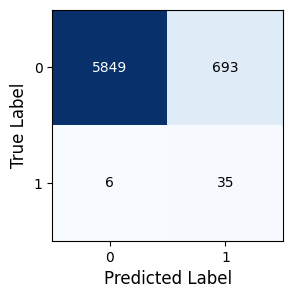

In [13]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, preds)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(3, 3), cmap=plt.cm.Blues)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
accuracy=(conf_matrix[0,0]+conf_matrix[1,1])/(conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[0,1]+conf_matrix[1,0])
sensitivity=conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
precision=conf_matrix[1,1]/(conf_matrix[0,1]+conf_matrix[1,1])
f1_score=2*precision*sensitivity/(precision+sensitivity)
plt.show()